In [253]:
#comp9517 lab2
#z5196480
#huiyao zuo
#answer in the code

In [254]:
import cv2
import matplotlib.pyplot as plt
import copy
import math

In [255]:
image = cv2.imread('COMP9517_20T2_Lab2_Image.jpg')

In [256]:
descriptor = cv2.xfeatures2d.SIFT_create()    
#use the descriptor default parameters to analyse the feture dot 

In [257]:
fe_num, det = descriptor.detectAndCompute(image, None)

In [258]:
image_fe = copy.deepcopy(image)                
#use deepcopy to get the copy of image to avoid the change to original image
cv2.drawKeypoints(image, fe_num, image_fe, color=(18,50,104))  
#use cv2.drawKeypoints to draw the feature point on the copy

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 245, 228],
        [254, 244, 227],
        [253, 243, 226]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 244, 227],
        [253, 243, 226],
        [253, 243, 226]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 243, 225],
        [253, 243, 225],
        [253, 243, 225]],

       ...,

       [[128, 107,  99],
        [131, 110, 102],
        [140, 119, 111],
        ...,
        [144, 123, 108],
        [143, 122, 107],
        [143, 123, 106]],

       [[125, 106,  99],
        [127, 108, 101],
        [129, 110, 103],
        ...,
        [144, 122, 110],
        [143, 121, 109],
        [144, 123, 108]],

       [[123, 104,  97],
        [123, 104,  97],
        [131, 112, 105],
        ...,
        [141, 119, 108],
        [141, 119, 107],
        [144, 122, 110]]

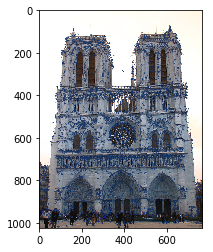

In [259]:
cv2.imwrite('img1.jpg',image_fe,[int(cv2.IMWRITE_JPEG_QUALITY),100])  #write the output photo with limited quality

plt.imshow(image_fe) #have different rgb channel but only use to observe the result

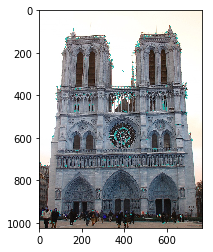

In [260]:
limited_fe_num = int(len(fe_num)*0.1)
#get the number of feature points
descriptor_2 = cv2.xfeatures2d.SIFT_create(nfeatures = limited_fe_num)
#only use 10% of fe_num to create the descriptor
fe_num_2, det_2 = descriptor_2.detectAndCompute(image, None)
#kp2, _ = descriptor_2.detectAndCompute(image, None)
image_fe_2 = copy.deepcopy(image)
cv2.drawKeypoints(image, fe_num_2, image_fe_2, color=(32,178,170))
#use cv2.drawKeypoints to draw the feature point on the copy
cv2.imwrite('img2.jpg',image_fe_2,[int(cv2.IMWRITE_JPEG_QUALITY),100])
#write the output photo with limited quality
plt.imshow(image_fe_2)

In [261]:
#task2

In [262]:
height, width = int(image.shape[0]*1.15), int(image.shape[1]*1.15)
#get the scale height and width
image_scale = cv2.resize(image, dsize=(width, height), interpolation=cv2.INTER_NEAREST)
#get the resize image though the cv2.resize

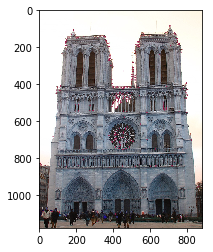

In [263]:
fe_num_scale, det_scale = descriptor_2.detectAndCompute(image_scale, None)
#get the fe_num_scale though the descriptor_2 with limited feature number
image_scale_2 = copy.deepcopy(image_scale)
#copy the image_scale
cv2.drawKeypoints(image_scale, fe_num_scale, image_scale_2, color=(149,28,72))

cv2.imwrite('img3.jpg',image_scale_2,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_scale_2)

In [264]:
matcher = cv2.BFMatcher()
#use cv2.BFMatcher() ro do match 
matche_scale = matcher.match(det_2, det_scale)
#match the two image
matche_scale = sorted(matche_scale, key = lambda x:x.distance)
#sort the match
image_m = cv2.drawMatches(image_fe_2,fe_num_2,image_scale_2,fe_num_scale,matches_scale[:5], None,flags=2)

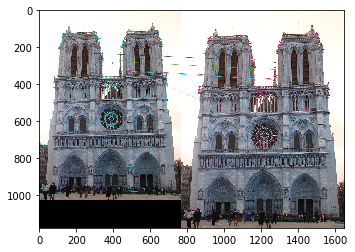

In [228]:
cv2.imwrite('img4.jpg',image_m,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_m)
#there have one wrong match 

In [ ]:
#(c)the two image's keypoints  roughly the same ,but still have little different , 
#by compare two keypionts images get this .
#maybe this is caused by strach the image ,the difference between some pixels the pixels is derease,
#so some original key is disappeare.

In [154]:
#task 3

In [230]:
center = image.shape[0]//2,image.shape[1]//2
#get the center

In [234]:
rot_matrix = cv2.getRotationMatrix2D((center[0], center[1]), 60, 1.0)
#get the rot_matrix
height, weight = image.shape[:2]
#get the height and weight
img_rotate_1 = cv2.warpAffine(image, rot_matrix, (weight, height))
#get the rotate image

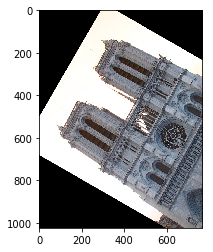

In [271]:
cv2.imwrite('img5.jpg',img_rotate_1,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(img_rotate_1)

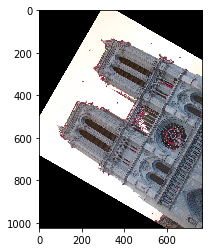

In [275]:
fe_num_rotate_r, det_rotate_r = descriptor_2.detectAndCompute(img_rotate_1, None)

image_rotate_c = copy.deepcopy(img_rotate_1)
#copy the image_scale
cv2.drawKeypoints(img_rotate_1, fe_num_rotate_r, image_rotate_c, color=(149,28,72))

cv2.imwrite('img7.jpg',image_rotate_c,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_rotate_c)

In [276]:
matche_scale_c = matcher.match(det_2, det_rotate_r)
#match the two image
matche_scale_c = sorted(matche_scale_c, key = lambda x:x.distance)
#sort the match
image_r = cv2.drawMatches(image_fe_2,fe_num_2,image_rotate_c,fe_num_rotate_r,matche_scale_c[:6], None,flags=2)


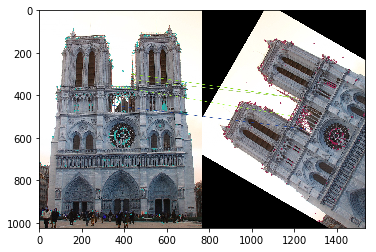

In [277]:
cv2.imwrite('img8.jpg',image_r,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_r)
#there have one wrong match 

In [238]:
rot_matrix = cv2.getRotationMatrix2D((center[0], center[1]), -60, 1.0)
img_rotate_2 = cv2.warpAffine(image, rot_matrix, (weight, height))
cv2.imwrite('img6.jpg',img_rotate_2,[int(cv2.IMWRITE_JPEG_QUALITY),100])

True

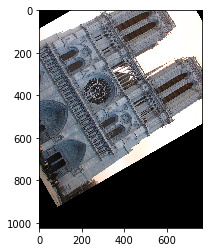

In [240]:
plt.imshow(img_rotate_2)

In [250]:
angle = 60
sin = math.sin((angle/180)*math.pi)
cos = math.cos((angle/180)*math.pi)
#get the sin and cos value
nweight = int((height * abs(sin)) + (weight * abs(cos)))
nheight = int((height * abs(cos)) + (weight * abs(sin)))
#get the new weight and height value
M = cv2.getRotationMatrix2D((center[1], center[0]), -angle, 1.0)
M[0, 2] += ((nweight / 2) - center[1])
M[1, 2] += ((nheight / 2) - center[0])

In [251]:
img_rotate_3 = cv2.warpAffine(image, M, (nweight, nheight))

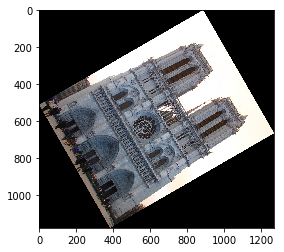

In [252]:
#cv2.imwrite('img7.jpg',img_rotate_3,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(img_rotate_3)

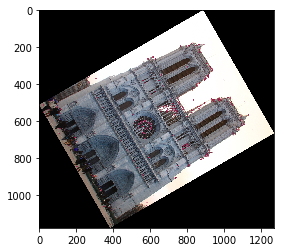

In [265]:
fe_num_rotate_r, det_rotate_r = descriptor_2.detectAndCompute(img_rotate_3, None)

image_rotate_c = copy.deepcopy(img_rotate_3)
#copy the image_scale
cv2.drawKeypoints(img_rotate_3, fe_num_rotate_r, image_rotate_c, color=(149,28,72))

cv2.imwrite('img7.jpg',image_rotate_c,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_rotate_c)

In [269]:
matche_scale_c = matcher.match(det_2, det_rotate_r)
#match the two image
matche_scale_c = sorted(matche_scale_c, key = lambda x:x.distance)
#sort the match
image_r = cv2.drawMatches(image_fe_2,fe_num_2,image_rotate_c,fe_num_rotate_r,matche_scale_c[:6], None,flags=2)


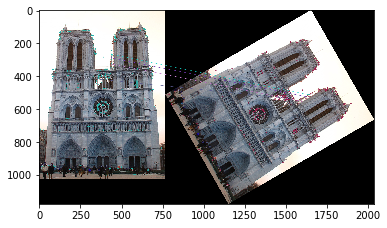

In [270]:
cv2.imwrite('img8.jpg',image_r,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_r)
#there have one wrong match 